<a href="https://colab.research.google.com/github/19K41A0577/AI/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
train=pd.read_csv('/content/sign-train.csv.zip')
test=pd.read_csv('/content/sign_mnist_test.csv (1).zip')

In [ ]:
train.head()

In [ ]:
test.info()

In [ ]:
train.shape

In [ ]:
test.shape

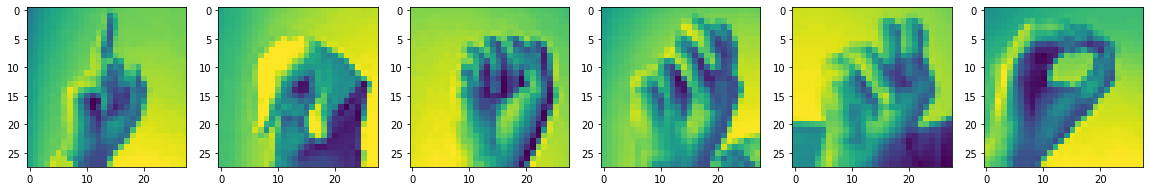

In [33]:
#Data Visualization
f = plt.figure(figsize=(20,6))
ax = f.add_subplot(161)
ax2 = f.add_subplot(162)
ax3 = f.add_subplot(163)
ax4 = f.add_subplot(164)
ax5 = f.add_subplot(165)
ax6 = f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train.iloc[20].values[1:].reshape(28,28))
ax4.imshow(train.iloc[456].values[1:].reshape(28,28))
ax5.imshow(train.iloc[999].values[1:].reshape(28,28))
ax6.imshow(train.iloc[1500].values[1:].reshape(28,28))
plt.show()

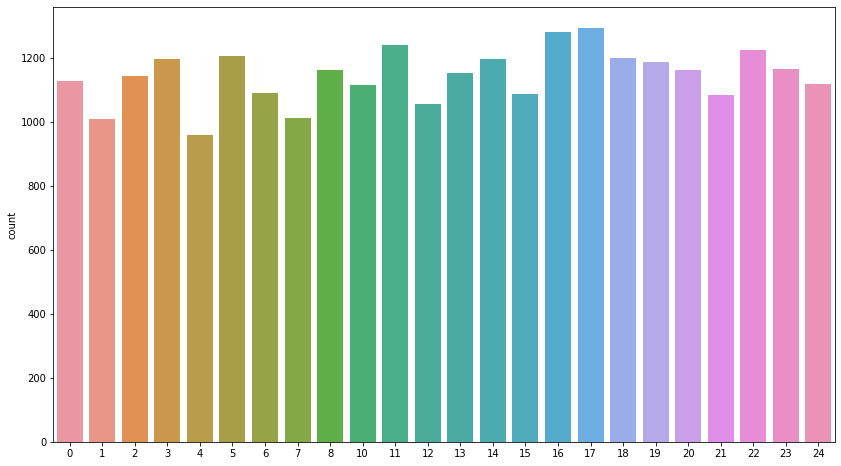

In [34]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [35]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [36]:
# Data Normalization, it helps to work CNN faster

X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [37]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [38]:
#Label Encoding

from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


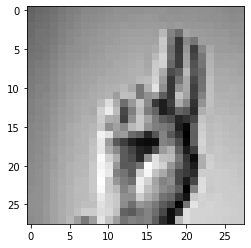

In [40]:
plt.imshow(X_train[10][:,:,0],cmap="gray")
plt.show()

In [42]:
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 512)       

In [44]:
model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [45]:
epochs = 10 
batch_size = 200

In [46]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,   # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False, # divide each input by its std
        zca_whitening=False,# dimesion reduction
        rotation_range=15, # dimesion reduction
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.15,   # randomly shift images horizontally 15%
        height_shift_range=0.15, # randomly shift images vertically 15%
        horizontal_flip=True,   # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [28]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
109/109 [==============================] - 317s 3s/step - loss: 3.1545 - accuracy: 0.0665 - val_loss: 2.9302 - val_accuracy: 0.1767
Epoch 2/10
109/109 [==============================] - 315s 3s/step - loss: 2.6267 - accuracy: 0.1876 - val_loss: 1.5895 - val_accuracy: 0.4870
Epoch 3/10
109/109 [==============================] - 318s 3s/step - loss: 2.0141 - accuracy: 0.3622 - val_loss: 1.1791 - val_accuracy: 0.6037
Epoch 4/10
109/109 [==============================] - 317s 3s/step - loss: 1.5260 - accuracy: 0.5002 - val_loss: 0.6099 - val_accuracy: 0.7816
Epoch 5/10
109/109 [==============================] - 316s 3s/step - loss: 1.1101 - accuracy: 0.6286 - val_loss: 0.3730 - val_accuracy: 0.8691
Epoch 6/10
109/109 [==============================] - 316s 3s/step - loss: 0.8383 - accuracy: 0.7192 - val_loss: 0.2609 - val_accuracy: 0.9131
Epoch 7/10
109/109 [==============================] - 316s 3s/step - loss: 0.6507 - accuracy: 0.7788 - val_loss: 0.1836 - val_accuracy: 0.9359

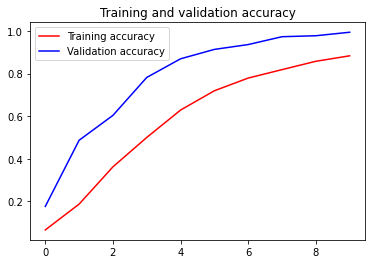

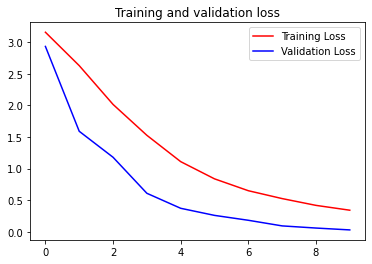

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()